2.1 answers:
 time (h)  LB S1 C (g/L)  LB S2 C (g/L)  TB S1 C (g/L)  TB S2 C (g/L)  LB C mean (g/L)  TB C mean (g/L)
     0.00       0.112816       0.123470       0.112816       0.123470         0.118143         0.118143
     0.26       0.148772       0.159426       0.126577       0.137231         0.154099         0.131904
     0.58       0.190499       0.201153       0.147884       0.158538         0.195826         0.153211
     0.87       0.238884       0.249538       0.164753       0.175406         0.244211         0.170080
     3.72       1.686886       1.697539       0.534965       0.545619         1.692213         0.540292
     4.18       2.087284       2.097937       0.665028       0.675682         2.092610         0.670355
     4.53       2.504106       2.514759       0.774671       0.785325         2.509432         0.779998
     5.73       3.718616       3.729270       1.294922       1.305576         3.723943         1.300249
     7.25       4.636601       4.647255       1.467

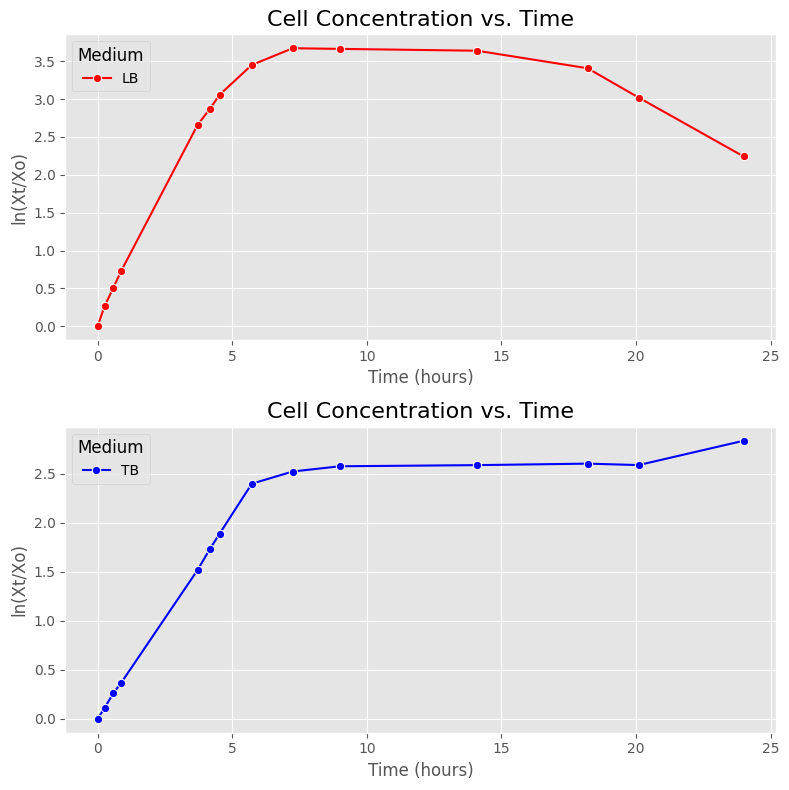


2.4 answers:
Visually predicted times (h) of the growth phases are:

Medium Lag Exponential Stationary   Death
    LB   -       0-4.5   7.3-14.1 14.1-24
    TB   -       0-5.7     7.3-24       -

2.5 answers:


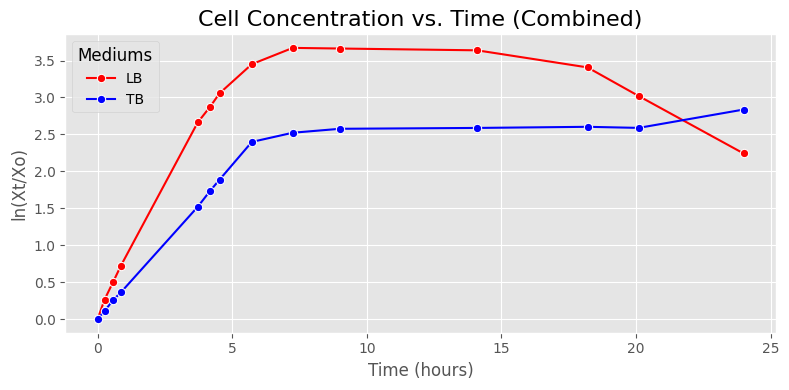


2.6 answers:
For rapid microbial growth LB is more suitable as exponential phase is shorter in time and cells reach higher levels of concentration than TB.
For production of secondary metabolites TB medium is more suitable, because it has a longer stationary phase than LB.

2.7 answers:


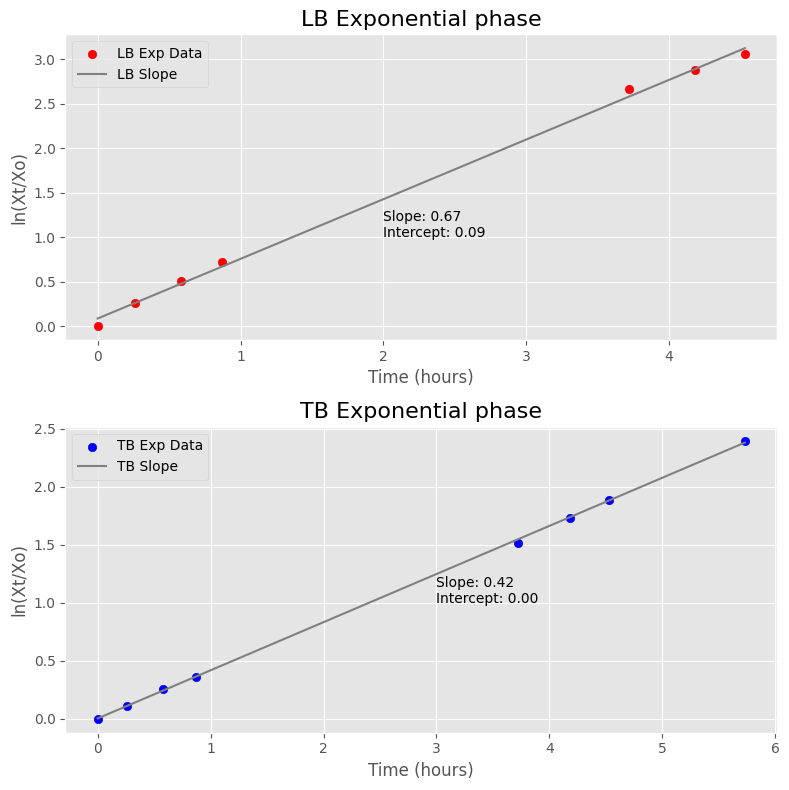


Specific growth rates (µ) and their intercepts for these exponential curves are:
LB: 0.67 h^-1 with intercept of 0.09
TB: 0.42 h^-1 with intercept of 0.00

2.8 answers:
LB R^2: 0.99791
TB R^2: 0.99979
Theoretically TB slope is more trustworthy, because it has a higher R^2 score than LB

2.9 answers: 
These are expected biomass concentrations for 3h of growth: 
LB: 0.962992 (g/L)
TB: 0.411907 (g/L)


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import r2_score

#got csv file in chatgpt from table screenshot
df = pd.read_csv('extracted_data.csv')

#2.1
df_c = df.loc[:, ['time (h)']].copy()
df_c.loc[:,'LB S1 C (g/L)'] = 0.4439 * df['OD600 LB (S1)'] - 0.0097
df_c.loc[:,'LB S2 C (g/L)'] = 0.4439 * df['OD600 LB (S2)'] - 0.0097
df_c.loc[:,'TB S1 C (g/L)'] = 0.4439 * df['OD600 TB (S1)'] - 0.0097
df_c.loc[:,'TB S2 C (g/L)'] = 0.4439 * df['OD600 TB (S2)'] - 0.0097
df_c.loc[:,'LB C mean (g/L)'] = (df_c['LB S1 C (g/L)'] + df_c['LB S2 C (g/L)']) / 2
df_c.loc[:,'TB C mean (g/L)'] = (df_c['TB S1 C (g/L)'] + df_c['TB S2 C (g/L)']) / 2
print("2.1 answers:")
print(df_c.to_string(index=False))

#2.2
print("\n2.2 answers:")
print("Xo value for both mediums is the same: ")
print("LB: ", df_c.loc[0,'LB C mean (g/L)'])
print("TB: ", df_c.loc[0,'TB C mean (g/L)'])
print("The units of µ have to be [h^-1] since t has [h] and ln(Xt/Xo) is adimensional")

#2.3
plt.style.use('ggplot')

data = {
    'time': [df_c.loc[i,'time (h)'] for i in range(len(df_c))],
    'LB C': [math.log(df_c.loc[i,'LB C mean (g/L)']/df_c.loc[0,'LB C mean (g/L)']) for i in range(len(df_c))],
    'TB C': [math.log(df_c.loc[i,'TB C mean (g/L)']/df_c.loc[0,'TB C mean (g/L)']) for i in range(len(df_c))]
}

df_graph = pd.DataFrame(data)

fig, axs = plt.subplots(2, 1, figsize=(8, 8))

sns.lineplot(x='time', y='LB C', data=df_graph, marker='o', label='LB', ax=axs[0], color='red')
sns.lineplot(x='time', y='TB C', data=df_graph, marker='o', label='TB', ax=axs[1], color='blue')

axs[0].set_title("Cell Concentration vs. Time", fontsize=16)
axs[0].set_xlabel("Time (hours)", fontsize=12)
axs[0].set_ylabel("ln(Xt/Xo)", fontsize=12)
axs[0].legend(title="Medium", fontsize=10, title_fontsize='12', loc='upper left')
axs[0].grid(True)

axs[1].set_title("Cell Concentration vs. Time", fontsize=16)
axs[1].set_xlabel("Time (hours)", fontsize=12)
axs[1].set_ylabel("ln(Xt/Xo)", fontsize=12)
axs[1].legend(title="Medium", fontsize=10, title_fontsize='12', loc='upper left')
axs[1].grid(True)

plt.tight_layout()

print("\n2.3 answers:")
plt.show()

#2.4
phases = [
    ["Medium", "Lag", "Exponential", "Stationary", "Death"],
    ["LB", "-", "0-4.5", "7.3-14.1", "14.1-24"],
    ["TB", "-", "0-5.7", "7.3-24", "-"]
]

df_phases = pd.DataFrame(phases[1:], columns=phases[0])

print("\n2.4 answers:")
print("Visually predicted times (h) of the growth phases are:\n")
print(df_phases.to_string(index=False))

#2.5
plt.figure(figsize=(8, 4))
sns.lineplot(x='time', y='LB C', data=df_graph, marker='o', label='LB', color='red')
sns.lineplot(x='time', y='TB C', data=df_graph, marker='o', label='TB', color='blue')


plt.title("Cell Concentration vs. Time (Combined)", fontsize=16)
plt.xlabel("Time (hours)", fontsize=12)
plt.ylabel("ln(Xt/Xo)", fontsize=12)
plt.legend(title="Mediums", fontsize=10, title_fontsize='12', loc='upper left')
plt.grid(True)
plt.tight_layout()

print("\n2.5 answers:")
plt.show()

#2.6
print("\n2.6 answers:")
print("For rapid microbial growth LB is more suitable as exponential phase is shorter in time and cells reach higher levels of concentration than TB.")
print("For production of secondary metabolites TB medium is more suitable, because it has a longer stationary phase than LB.")

#2.7
lb_exp_time = np.array(data['time'][0:7])
lb_exp_data = np.array(data['LB C'][0:7])

tb_exp_time = np.array(data['time'][0:8])
tb_exp_data = np.array(data['TB C'][0:8])

lb_slope, lb_intercept = np.polyfit(lb_exp_time, lb_exp_data, 1)
tb_slope, tb_intercept = np.polyfit(tb_exp_time, tb_exp_data, 1)

slopes, bxs = plt.subplots(2, 1, figsize=(8, 8))

bxs[0].scatter(lb_exp_time, lb_exp_data, color='red', label='LB Exp Data', marker='o')
bxs[0].plot(lb_exp_time, lb_slope * lb_exp_time + lb_intercept, color='gray', label='LB Slope')
bxs[0].text(2, 1, f'Slope: {lb_slope:.2f}\nIntercept: {lb_intercept:.2f}')
bxs[0].set_title("LB Exponential phase", fontsize=16)
bxs[0].set_xlabel("Time (hours)", fontsize=12)
bxs[0].set_ylabel("ln(Xt/Xo)", fontsize=12)
bxs[0].legend(fontsize=10, title_fontsize='12')
bxs[0].grid(True)

bxs[1].scatter(tb_exp_time, tb_exp_data, color='blue', label='TB Exp Data', marker='o')
bxs[1].plot(tb_exp_time, tb_slope * tb_exp_time + tb_intercept, color='gray', label='TB Slope')
bxs[1].text(3, 1, f'Slope: {tb_slope:.2f}\nIntercept: {tb_intercept:.2f}')
bxs[1].set_title("TB Exponential phase", fontsize=16)
bxs[1].set_xlabel("Time (hours)", fontsize=12)
bxs[1].set_ylabel("ln(Xt/Xo)", fontsize=12)
bxs[1].legend(fontsize=10, title_fontsize='12')
bxs[1].grid(True)

plt.tight_layout()

print("\n2.7 answers:")
plt.show()
print('\nSpecific growth rates (µ) and their intercepts for these exponential curves are:')
print(f'LB: {lb_slope:.2f} h^-1 with intercept of {lb_intercept:.2f}')
print(f'TB: {tb_slope:.2f} h^-1 with intercept of {tb_intercept:.2f}')

#2.8
#calculate predicted values based on acquired slope and intercept
lb_predicted = lb_slope * lb_exp_time + lb_intercept
tb_predicted = tb_slope * tb_exp_time + tb_intercept

lb_r2 = r2_score(lb_exp_data, lb_predicted)
tb_r2 = r2_score(tb_exp_data, tb_predicted)

print("\n2.8 answers:")
print(f'LB R^2: {lb_r2:.5f}')
print(f'TB R^2: {tb_r2:.5f}')
print("Theoretically TB slope is more trustworthy, because it has a higher R^2 score than LB")

#2.9
print("\n2.9 answers: ")
print("These are expected biomass concentrations for 3h of growth: ")
print(f"LB: {df_c.loc[0,'LB C mean (g/L)'] * math.exp(lb_slope * 3 + lb_intercept):.6f} (g/L)")
print(f"TB: {df_c.loc[0,'TB C mean (g/L)'] * math.exp(tb_slope * 3 + tb_intercept):.6f} (g/L)")
